# 1. Kaggle房价竞赛

In [ ]:
import hashlib
import os
import tarfile
import zipfile
import requests
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
%matplotlib inline

# 定义一个空字典DATA_HUB，用于存储数据集
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

def download(name, cache_dir=os.path.join('.', '01_data/02_DataSet_Kaggle_House')):
    """下载一个DATA_HUB中的文件，返回本地文件名"""
        # 断言 name 存在于 DATA_HUB 中，否则抛出异常
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."
    url , sha1_hash = DATA_HUB[name]
        # 创建一个目录，如果目录已经存在，则不报错
    os.makedirs(cache_dir, exist_ok=True)
        # 获取url中最后一个斜杠后面的内容包括，并将其与cache_dir拼接
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):# 判断文件是否存在
        sha1 = hashlib.sha1()# 计算文件的sha1值
        with open(fname,'rb') as f:# 以二进制形式打开文件
            while True:
                data = f.read(1048576)# 读取文件，每次读取1048576字节
                if not data:
                    break# 如果文件读取完毕，则退出循环
                sha1.update(data)# 更新sha1值的计算
        if sha1.hexdigest() == sha1_hash:# 判断文件的sha1值是否与给定的sha1_hash相等
            return fname# 如果相等，则返回文件的路径
    print(f'正在从{url}下载{fname}...')
    # 使用requests.get方法获取URL内容，stream参数设置为True，
    # 表示以流模式获取内容，verify参数设置为True，表示校验SSL证书
    r = requests.get(url,stream=True,verify=True)
    with open(fname,'wb') as f:
        f.write(r.content)
    return fname
    
def download_extract(name, folder=None):
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
        # 分离文件名和扩展名
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp,extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():
    """下载DATA_UHB中的所有文件"""
    for name in DATA_HUB:
        download(name)

DATA_HUB['kaggle_house_train'] = (DATA_URL + 'kaggle_house_pred_train.csv','585e9cc9370b9160e7921475fbcd7d31219ce')         
DATA_HUB['kaggle_house_test'] = (DATA_URL + 'kaggle_house_pred_test.csv', 'fal9780a7b011d9b009e8bff8e99922a8ee2eb90')     
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))
print(train_data.shape) # 1460个样本，80个te特征，1个标号label
print(test_data.shape) # 测试样本没有标号label

print(train_data.iloc[0:4,[0,1,2,3,-3,-2,-1]]) # 前面四行的某些列特征

## 使用本地数据集

In [1]:
import hashlib
import os
import tarfile
import zipfile
import requests
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
%matplotlib inline

# 定义一个空字典DATA_HUB，用于存储数据集
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

def download(name, cache_dir=os.path.join('.', '01_data/02_DataSet_Kaggle_House')):
    """下载一个DATA_HUB中的文件，返回本地文件名"""
        # 断言 name 存在于 DATA_HUB 中，否则抛出异常
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."
    url , sha1_hash = DATA_HUB[name]
        # 创建一个目录，如果目录已经存在，则不报错
    os.makedirs(cache_dir, exist_ok=True)
        # 获取url中最后一个斜杠后面的内容包括，并将其与cache_dir拼接
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):# 判断文件是否存在
        sha1 = hashlib.sha1()# 计算文件的sha1值
        with open(fname,'rb') as f:# 以二进制形式打开文件
            while True:
                data = f.read(1048576)# 读取文件，每次读取1048576字节
                if not data:
                    break# 如果文件读取完毕，则退出循环
                sha1.update(data)# 更新sha1值的计算
        if sha1.hexdigest() == sha1_hash:# 判断文件的sha1值是否与给定的sha1_hash相等
            return fname# 如果相等，则返回文件的路径
    print(f'正在从{url}下载{fname}...')
    # 使用requests.get方法获取URL内容，stream参数设置为True，
    # 表示以流模式获取内容，verify参数设置为True，表示校验SSL证书
    r = requests.get(url,stream=True,verify=True)
    with open(fname,'wb') as f:
        f.write(r.content)
    return fname
    
def download_extract(name, folder=None):
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
        # 分离文件名和扩展名
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp,extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():
    """下载DATA_UHB中的所有文件"""
    for name in DATA_HUB:
        download(name)

# DATA_HUB['kaggle_house_train'] = (DATA_URL + 'kaggle_house_pred_train.csv','585e9cc9370b9160e7921475fbcd7d31219ce')         
# DATA_HUB['kaggle_house_test'] = (DATA_URL + 'kaggle_house_pred_test.csv', 'fal9780a7b011d9b009e8bff8e99922a8ee2eb90')     
# train_data = pd.read_csv('01_data/archive/train.csv')
# test_data = pd.read_csv('01_data/archive/test.csv')
train_data = pd.read_csv('01_data/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('01_data/house-prices-advanced-regression-techniques/test.csv')
print(train_data.shape) # 1460个样本，80个te特征，1个标号label
print(test_data.shape) # 测试样本没有标号label

print(train_data.iloc[0:4,[0,1,2,3,-3,-2,-1]]) # 前面四行的某些列特征

(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [2]:
# 在每个样本中，第一个特征是ID，将其从数据集中删除  
all_features = pd.concat((train_data.iloc[:,1:-1],test_data.iloc[:,1:])) # 从第2列开始，第1列没有了 
print(all_features.iloc[0:4,[0,1,2,3,-3,-2,-1]])

   MSSubClass MSZoning  LotFrontage  LotArea  YrSold SaleType SaleCondition
0          60       RL         65.0     8450    2008       WD        Normal
1          20       RL         80.0     9600    2007       WD        Normal
2          60       RL         68.0    11250    2008       WD        Normal
3          70       RL         60.0     9550    2006       WD       Abnorml


In [3]:
# 将所有缺失的值替换成相应特征的平均值
# 通过将特征重新缩放到零均值和单位方差来标准化数据
print(all_features.dtypes) # 可以知道每一列分别为什么类型特征
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index  # 当值的类型不是object的话，就是一个数值
print(numeric_features)
all_features[numeric_features] = all_features[numeric_features].apply(
    # 定义一个匿名函数，参数为x，返回值为(x - x.mean()) / (x.std())
    # x.mean() x的均值
    # x.std() x的标准差
    lambda x: (x - x.mean()) / (x.std())) # 对数值数据变为总体为均值为0，方差为1的分布的数据        
all_features[numeric_features] = all_features[numeric_features].fillna(0)  # 将数值数据中not number的数据用0填充      

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [4]:
# 处理离散值。用一次独热编码替换它们
# 若一列里面有五个不同的值，则创建五个features(特征)，如果该列中为该feature则为1，不为该feature则为0
# 将all_features中的数据进行独热编码，并将空值也编码为新的特征
all_features = pd.get_dummies(all_features,dummy_na=True)
# 查看独热编码后的数据形状
all_features.shape

(2919, 330)

In [5]:
# 从pandas格式中提取Numpy格式，并将其转换为张量表示
print(train_data.shape)
all_features = all_features.astype('float32')
n_train = train_data.shape[0] # 样本个数
train_features = torch.tensor(all_features[:n_train].values,
                              dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values,
                             dtype=torch.float32)
# train_data的SalePrice列是label值
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1,1),
                            dtype=torch.float32)

(1460, 81)


In [6]:
# 训练
loss = nn.MSELoss()
print(train_features.shape[1]) # 所有特征个数
in_features = train_features.shape[1]
def get_net():
    net = nn.Sequential(nn.Linear(in_features,1)) # 单层线性回归
    return net

330


① 我们更关心相对误差$\frac{y - \hat{y}}{y}$，解决这个问题的一种方法是用价格预测的对数来衡量差异。

② 100万的房子，预测与真实值相差5万，10万的房子，预测与真实值相差5万，是不一样的。

In [7]:
def log_rmse(net, features, labels): # 对数均方根误差（Log RMSE）
    clipped_preds = torch.clamp(net(features),1,float('inf')) # 把模型输出的值限制在1和inf之间，inf代表无穷大（infinity的缩写）       
    rmse = torch.sqrt(loss(torch.log(clipped_preds),torch.log(labels))) # 预测做log，label做log，然后丢到MSE损失函数里
    return rmse.item()

In [8]:
# 训练函数将借助Adam优化器 -Adam 自适应学习率
def train(net, train_features, train_labels, test_features, test_labels,
         num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X),y)
            l.backward()
            optimizer.step()
        # 把log_rmse函数的返回值添加到train_ls列表中
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [9]:
# K折交叉验证
def get_k_fold_data(k,i,X,y): # 给定k折，给定第几折，返回相应的训练集、测试集
    assert k > 1
    fold_size = X.shape[0] // k  # 每一折的大小为样本数除以k
    X_train, y_train = None, None
    for j in range(k): # 每一折
        idx = slice(j * fold_size, (j+1)*fold_size) # 每一折的切片索引间隔  
        X_part, y_part = X[idx,:], y[idx] # 把每一折对应部分取出来
        if j == i: # i表示第几折，把它作为验证集
            X_valid, y_valid = X_part, y_part
        elif X_train is None: # 第一次看到X_train，则把它存起来 
            X_train, y_train = X_part, y_part
        else: # 后面再看到，除了第i外，其余折也作为训练数据集，用torch.cat将原先的合并    
            X_train = torch.cat([X_train, X_part],0)
            y_train = torch.cat([y_train, y_part],0)
    return X_train, y_train, X_valid, y_valid # 返回训练集和验证集

In [10]:
# 返回训练和验证误差的平均值
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train) # 把第i折对应分开的数据集、验证集拿出来   
        net = get_net()
        # *是解码，变成前面返回的四个数据
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size) # 训练集、验证集丢进train函数 
        
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls,valid_ls],
                    xlabel='epoch',ylabel='rmse',xlim=[1,num_epochs],
                    legend=['train','valid'],yscale='log')
        print(f'fold{i+1},train log rmse {float(train_ls[-1]):f},'
             f'valid log rmse {float (valid_ls[-1]):f}')
    return  train_l_sum / k, valid_l_sum / k # 求和做平均

fold1,train log rmse 0.142903,valid log rmse 0.142128
fold2,train log rmse 0.137951,valid log rmse 0.170671
fold3,train log rmse 0.137542,valid log rmse 0.150789
fold4,train log rmse 0.141159,valid log rmse 0.139702
fold5,train log rmse 0.138417,valid log rmse 0.168347
5-折验证：平均训练log rmse：0.139594,平均验证log rmse：0.154327


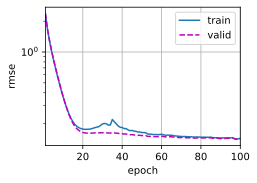

In [14]:
# 模型选择
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 20, 0.1, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)   
print(f'{k}-折验证：平均训练log rmse：{float(train_l):f},'f'平均验证log rmse：{float(valid_l):f}')    

训练log rmse：0.137528


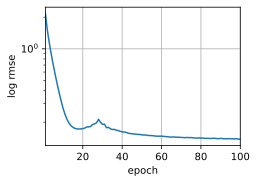

In [15]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('mods/213_submission.csv', index=False)
    
train_and_pred(train_features, test_features, train_labels, test_data,
              num_epochs, lr, weight_decay, batch_size)

## 调用GPU进行训练

(1460, 81)
(1459, 80)
   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000
   MSSubClass MSZoning  LotFrontage  LotArea  YrSold SaleType SaleCondition
0          60       RL         65.0     8450    2008       WD        Normal
1          20       RL         80.0     9600    2007       WD        Normal
2          60       RL         68.0    11250    2008       WD        Normal
3          70       RL         60.0     9550    2006       WD       Abnorml
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
Sal

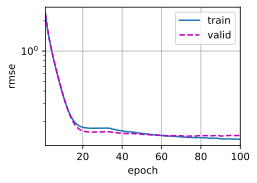

In [16]:
import hashlib
import os
import tarfile
import zipfile
import requests
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
%matplotlib inline

# 定义一个空字典DATA_HUB，用于存储数据集
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

# 检查是否有可用的 GPU，如果有，设置 PyTorch 来使用 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确保模型和数据都在 GPU 上
def try_gpu(m):
    return m.to(device)

def download(name, cache_dir=os.path.join('.', '01_data/02_DataSet_Kaggle_House')):
    """下载一个DATA_HUB中的文件，返回本地文件名"""
        # 断言 name 存在于 DATA_HUB 中，否则抛出异常
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."
    url , sha1_hash = DATA_HUB[name]
        # 创建一个目录，如果目录已经存在，则不报错
    os.makedirs(cache_dir, exist_ok=True)
        # 获取url中最后一个斜杠后面的内容包括，并将其与cache_dir拼接
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):# 判断文件是否存在
        sha1 = hashlib.sha1()# 计算文件的sha1值
        with open(fname,'rb') as f:# 以二进制形式打开文件
            while True:
                data = f.read(1048576)# 读取文件，每次读取1048576字节
                if not data:
                    break# 如果文件读取完毕，则退出循环
                sha1.update(data)# 更新sha1值的计算
        if sha1.hexdigest() == sha1_hash:# 判断文件的sha1值是否与给定的sha1_hash相等
            return fname# 如果相等，则返回文件的路径
    print(f'正在从{url}下载{fname}...')
    # 使用requests.get方法获取URL内容，stream参数设置为True，
    # 表示以流模式获取内容，verify参数设置为True，表示校验SSL证书
    r = requests.get(url,stream=True,verify=True)
    with open(fname,'wb') as f:
        f.write(r.content)
    return fname
    
def download_extract(name, folder=None):
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
        # 分离文件名和扩展名
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp,extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():
    """下载DATA_UHB中的所有文件"""
    for name in DATA_HUB:
        download(name)

DATA_HUB['kaggle_house_train'] = (DATA_URL + 'kaggle_house_pred_train.csv','585e9cc9370b9160e7921475fbcd7d31219ce')         
DATA_HUB['kaggle_house_test'] = (DATA_URL + 'kaggle_house_pred_test.csv', 'fal9780a7b011d9b009e8bff8e99922a8ee2eb90')     
train_data = pd.read_csv('01_data/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('01_data/house-prices-advanced-regression-techniques/test.csv')
# train_data = pd.read_csv('01_data/archive/train.csv')
# test_data = pd.read_csv('01_data/archive/test.csv')
print(train_data.shape) # 1460个样本，80个te特征，1个标号label
print(test_data.shape) # 测试样本没有标号label

print(train_data.iloc[0:4,[0,1,2,3,-3,-2,-1]]) # 前面四行的某些列特征

# 在每个样本中，第一个特征是ID，将其从数据集中删除  
all_features = pd.concat((train_data.iloc[:,1:-1],test_data.iloc[:,1:])) # 从第2列开始，第1列没有了 
print(all_features.iloc[0:4,[0,1,2,3,-3,-2,-1]])

# 将所有缺失的值替换成相应特征的平均值
# 通过将特征重新缩放到零均值和单位方差来标准化数据
print(all_features.dtypes) # 可以知道每一列分别为什么类型特征
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index  # 当值的类型不是object的话，就是一个数值
print(numeric_features)
all_features[numeric_features] = all_features[numeric_features].apply(
    # 定义一个匿名函数，参数为x，返回值为(x - x.mean()) / (x.std())
    # x.mean() x的均值
    # x.std() x的标准差
    lambda x: (x - x.mean()) / (x.std())) # 对数值数据变为总体为均值为0，方差为1的分布的数据        
all_features[numeric_features] = all_features[numeric_features].fillna(0)  # 将数值数据中not number的数据用0填充      

# 处理离散值。用一次独热编码替换它们
# 若一列里面有五个不同的值，则创建五个features，如果该列中为该feature则为1，不为该feature则为0
# 将all_features中的数据进行独热编码，并将空值也编码为新的特征
all_features = pd.get_dummies(all_features,dummy_na=True) 
# 查看独热编码后的数据形状
all_features.shape

# 从pandas格式中提取Numpy格式，并将其转换为张量表示
print(train_data.shape)
n_train = train_data.shape[0] # 样本个数
all_features = all_features.astype('float32')
train_features = torch.tensor(all_features[:n_train].values,
                              dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values,
                             dtype=torch.float32)
# train_data的SalePrice列是label值
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1,1),
                            dtype=torch.float32)

# 训练
loss = nn.MSELoss()
print(train_features.shape[1]) # 所有特征个数
in_features = train_features.shape[1]
def get_net():
    net = nn.Sequential(nn.Linear(in_features,1)) # 单层线性回归
    return net

def log_rmse(net, features, labels):
    clipped_preds = torch.clamp(net(features),1,float('inf')) # 把模型输出的值限制在1和inf之间，inf代表无穷大（infinity的缩写）       
    rmse = torch.sqrt(loss(torch.log(clipped_preds),torch.log(labels))) # 预测做log，label做log，然后丢到MSE损失函数里
    return rmse.item()

# 训练函数将借助Adam优化器 -Adam 自适应学习率
def train(net, train_features, train_labels, test_features, test_labels,
         num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    net = try_gpu(net)  # 将模型移动到 GPU
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)  # 将数据移动到 GPU
            optimizer.zero_grad()
            l = loss(net(X),y)
            l.backward()
            optimizer.step()
        # 把log_rmse函数的返回值添加到train_ls列表中
        train_ls.append(log_rmse(net,train_features,train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# K折交叉验证
def get_k_fold_data(k,i,X,y): # 给定k折，给定第几折，返回相应的训练集、测试集
    assert k > 1
    fold_size = X.shape[0] // k  # 每一折的大小为样本数除以k
    X_train, y_train = None, None
    for j in range(k): # 每一折
        idx = slice(j * fold_size, (j+1)*fold_size) # 每一折的切片索引间隔  
        X_part, y_part = X[idx,:].to(device), y[idx].to(device) # 把每一折对应部分取出来
        if j == i: # i表示第几折，把它作为验证集
            X_valid, y_valid = X_part, y_part
        elif X_train is None: # 第一次看到X_train，则把它存起来 
            X_train, y_train = X_part, y_part
        else: # 后面再看到，除了第i外，其余折也作为训练数据集，用torch.cat将原先的合并    
            X_train = torch.cat([X_train, X_part],0)
            y_train = torch.cat([y_train, y_part],0)
    return X_train, y_train, X_valid, y_valid # 返回训练集和验证集

# 返回训练和验证误差的平均值
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train) # 把第i折对应分开的数据集、验证集拿出来   
        net = get_net()
        net = try_gpu(net)  # 将模型移动到 GPU
        # *是解码，变成前面返回的四个数据
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size) # 训练集、验证集丢进train函数 
        
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls,valid_ls],
                    xlabel='epoch',ylabel='rmse',xlim=[1,num_epochs],
                    legend=['train','valid'],yscale='log')
        print(f'fold{i+1},train log rmse {float(train_ls[-1]):f},'
             f'valid log rmse {float (valid_ls[-1]):f}')
    return  train_l_sum / k, valid_l_sum / k # 求和做平均

# 模型选择
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 20, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)   
print(f'{k}-折验证：平均训练log rmse：{float(train_l):f},'f'平均验证log rmse：{float(valid_l):f}')    


# 番外 使用autoluon 自动调参

In [ ]:
#install.sh
# 创建并激活 Python 3.8 虚拟环境
# conda create -y --force -n autogluon python=3.8 pip
# conda activate autogluon

# 安装 AutoGluon
pip install "mxnet<2.0.0"
pip install autogluon

In [7]:
# 安装 AutoGluon
# !pip install "mxnet<2.0.0"
!pip install autogluon

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/09/a9/0ff0018db2048058d04541279cb31e1364515b2e0fc804c954ac33cbb870/autogluon-1.1.1-py3-none-any.whl (9.7 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/5c/bb/cd3d9dbb736acf75bf711ee76401a95339807bf9c478eff7b977bd23ecc6/autogluon.core-1.1.1-py3-none-any.whl (234 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c9/18/c6749ba777564d735218023c0a38a80d03ba2ec61165b5144eb35d6c0588/autogluon.features-1.1.1-py3-none-any.whl (63 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/7a/25/0e022e7a1dce34bd6b9e015d19e3ac317869439864a5e34995a65050c720/autogluon.tabular-1.1.1-py3-none-any.whl (312 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/eb/6a/6d1262221b2dcaab29a1c387057b9cf5f6296a21ffa6bf872573fe48c749/autogluon.multimodal-1.1.1-py3-none-any.whl (427 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/31/5f/c763c00a

  You can safely remove it manually.


In [12]:
# run.py
from autogluon.tabular import TabularDataset, TabularPredictor

# 加载数据集
train_data = TabularDataset(
    '01_data/house-prices-advanced-regression-techniques/train.csv' )
# 数据预处理
id, label = 'Id', 'SalePrice'

# 创建TabularPredictor对象，label参数表示预测的标签，drop参数表示在训练时删除id列
predictor = TabularPredictor(label=label).fit(
    train_data.drop(columns=[id]))

# 预测
import pandas as pd
test_data = TabularDataset(
    '01_data/house-prices-advanced-regression-techniques/test.csv')

# 调用predictor的predict方法，传入参数为test_data.drop(columns=[id])，即删除id列后的test_data
preds = predictor.predict(test_data.drop(columns=[id]))
# 将预测结果和测试数据合并为一个DataFrame，其中id为索引，label为预测结果
submission = pd.DataFrame({id:test_data[id], label:preds})
submission.to_csv('submission.csv', index=False)





Loaded data from: 01_data/house-prices-advanced-regression-techniques/train.csv | Columns = 81 / 81 | Rows = 1460 -> 1460
No path specified. Models will be saved in: "AutogluonModels\ag-20240628_030146"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          12
Memory Avail:       3.38 GB / 15.90 GB (21.3%)
Disk Space Avail:   65.34 GB / 244.14 GB (26.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with 

[1000]	valid_set's rmse: 26908.7
[2000]	valid_set's rmse: 26617.6
[3000]	valid_set's rmse: 26569.8
[4000]	valid_set's rmse: 26566.1
[5000]	valid_set's rmse: 26569.2


	-26566.0786	 = Validation score   (-root_mean_squared_error)
	7.53s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29319.9
[2000]	valid_set's rmse: 28847.1
[3000]	valid_set's rmse: 28706.5
[4000]	valid_set's rmse: 28663.8
[5000]	valid_set's rmse: 28654.9
[6000]	valid_set's rmse: 28653.7
[7000]	valid_set's rmse: 28653.3
[8000]	valid_set's rmse: 28653.3
[9000]	valid_set's rmse: 28653.4


	-28653.3015	 = Validation score   (-root_mean_squared_error)
	16.27s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-32547.7083	 = Validation score   (-root_mean_squared_error)
	2.47s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ...
	-30800.849	 = Validation score   (-root_mean_squared_error)
	609.58s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-31938.4772	 = Validation score   (-root_mean_squared_error)
	1.32s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-31917.753	 = Validation score   (-root_mean_squared_error)
	9.13s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: XGBoost ...
	-29812.6009	 = Validation score   (-root_mean_squared_error)
	2.93s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-35817.3865	 = Validation score   (-root_mean_squared_error)
	12.1s	 = Training   runt

[1000]	valid_set's rmse: 31962.7
[2000]	valid_set's rmse: 31887.6
[3000]	valid_set's rmse: 31885.7
[4000]	valid_set's rmse: 31885.7


	-31885.6763	 = Validation score   (-root_mean_squared_error)
	17.09s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.7, 'LightGBM': 0.15, 'XGBoost': 0.15}
	-26249.2566	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 682.12s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1859.9 rows/s (292 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240628_030146")
Loaded data from: 01_data/house-prices-advanced-regression-techniques/test.csv | Columns = 80 / 80 | Rows = 1459 -> 1459


In [2]:
# run.py
from autogluon.tabular import TabularDataset, TabularPredictor

# 加载数据集
train_data = TabularDataset(
    '01_data/house-prices-advanced-regression-techniques/train.csv' )
# 数据预处理
id, label = 'Id', 'SalePrice'

# 创建TabularPredictor对象，并使用fit方法进行训练
predictor = TabularPredictor(label=label).fit(
    train_data.drop(columns=[id]),  # 确保drop方法调用正确
    hyperparameters='multimodal',   # 使用关键字参数
    num_stack_levels=1,             # 定义堆栈层数
    num_bag_folds=5                 # 定义袋子的数量，注意这里应该是bag_folds而不是bag_folads
)

# 预测
import pandas as pd
test_data = TabularDataset(
    '01_data/house-prices-advanced-regression-techniques/test.csv')

# 调用predictor的predict方法，传入参数为test_data.drop(columns=[id])，即删除id列后的test_data
preds = predictor.predict(test_data.drop(columns=[id]))
# 将预测结果和测试数据合并为一个DataFrame，其中id为索引，label为预测结果
submission = pd.DataFrame({id:test_data[id], label:preds})
submission.to_csv('submission.csv', index=False)





c:\Users\18368\.conda\envs\autogluon\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels\ag-20240628_092121"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          12
Memory Avail:       4.16 GB / 15.90 GB (26.2%)
Disk Space Avail:   65.06 GB / 244.14 GB (26.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	pres

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [1]:
import torch
from torch import nn

torch.device('cuda'), 
# torch.device('cpu'),
# torch.cuda.device('cuda'),
# torch.cuda.device('cuda:1')

(device(type='cuda'),)